# 直方图与傅里叶变换

In [1]:
#导入相关库与包
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#定义一个图片显示函数
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 直方图统计方法
## cv2.calcHist(images,channels,mask,histSize,range)
### - images:原图像图像格式为uint8 或 float32。当传入函数时对应用中括号[ ]括起来例如[img]
### - channels:同样用中括号来括起来，他会告诉函数我们统幅图像的直方图。如果输入图像是灰度图，他的值就是【0】，如果是彩色图像的传入参数可以是【0】【1】【2】，他们分别对应这BGR。
### - mask:掩膜图像。统整幅图像的直方图就把它为None.但是如果你想统图像某一分的直方图的你就制作一个掩膜图像并使用它。
### - histSize:BIN的数目，也应用中括号阔来。
### - range:像素值范围为【0,255】

In [7]:
img = cv2.imread("bus.jpg",0)    #0表示灰度图
hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist.shape

(256, 1)

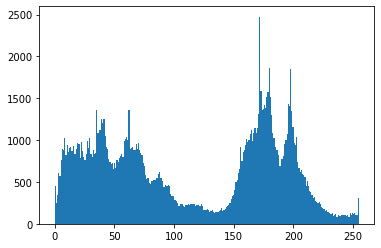

In [6]:
plt.hist(img.ravel(),256)
plt.show()

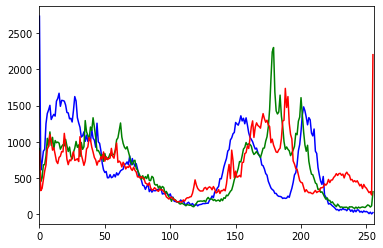

In [8]:
img = cv2.imread('bus.jpg')
color = ('b','g','r')
for i,col in enumerate(color):     #枚举的格式
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

### mask操作

In [19]:
#创建mask
mask = np.zeros(img.shape[:2],np.uint8)
print(mask.shape)
mask[100:200,100:400] = 255
cv_show("mask",mask)

(300, 533)


In [16]:
masked_img = cv2.bitwise_and(img,img,mask=mask)   #与操作
cv_show("masked_img",masked_img)

In [17]:
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

<function matplotlib.pyplot.show(*args, **kw)>

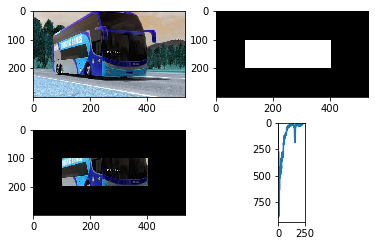

In [18]:
plt.subplot(221),plt.imshow(img,"gray")
plt.subplot(222),plt.imshow(mask,"gray")
plt.subplot(223),plt.imshow(masked_img,"gray")
plt.subplot(224),plt.imshow(hist_full),plt.plot(hist_mask)
plt.xlim([0,255])
plt.show

# 直方图均衡化

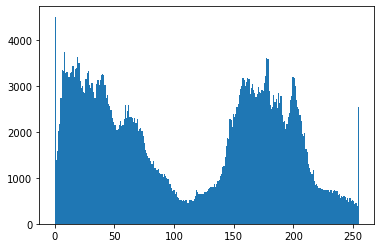

In [20]:
kan = cv2.imread("kan.jpg",0)
plt.hist(img.ravel(),256)
plt.show()

In [21]:
cv_show("kan",kan)

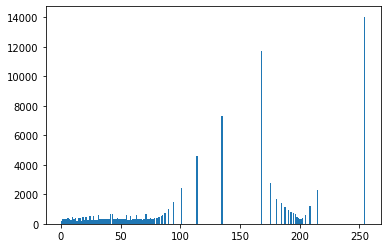

In [23]:
equ = cv2.equalizeHist(kan)
plt.hist(equ.ravel(),256)
plt.show()

In [24]:
cv_show("equ",equ)     #均衡化的颜色会更深了

In [25]:
#加载另一张图
bus = cv2.imread("bus.jpg",0)
bus_equ = cv2.equalizeHist(bus)
res = np.hstack((bus,bus_equ))
cv_show("res",res)

In [26]:
#在加载另一张图
san = cv2.imread("san.jfif",0)
san_equ = cv2.equalizeHist(san)
res = np.hstack((san,san_equ))
cv_show("res",res)

## 自适应直方图均衡化

In [28]:
clabe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8,8))

In [30]:
res_clabe = clabe.apply(bus)
res = np.hstack((bus,bus_equ,res_clabe))
cv_show("res",res)

In [32]:
res_clabe = clabe.apply(kan)
kan_equ = cv2.equalizeHist(kan)
res = np.hstack((kan,kan_equ,res_clabe))
cv_show("res",res)

# 傅里叶变换

## 傅里叶变换的作用：
### - 高频：变化剧烈的灰度分量，例如边界；
### - 低频：变化缓慢的灰度分量，例如一片大海。
## 滤波
### 低通滤波器：只保留低频，会使得图像模糊；
### 高通滤波器：只保留高频，会使得图像细节增强。



#### opencv中主要就是cv2.dft()和cv2.idft,输入图像需要先转换成np.float32格式；
#### 得到的结果中频率为0的部分会在左上角，通常位置，可以通过shift变换来实现；
#### cv2.dft()返回的结果是双通道的（实部，虚部），通常还需要转换成图像格式才能显示（0，255）。

<function matplotlib.pyplot.show(*args, **kw)>

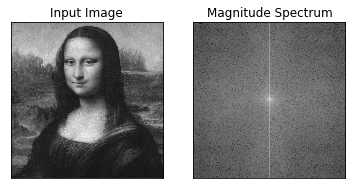

In [40]:
img =cv2.imread("lisa.jfif",0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32,flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
#得到灰度图能表示的形式
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img,cmap = "gray")
plt.title("Input Image"),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum,cmap = "gray")
plt.title("Magnitude Spectrum"),plt.xticks([]),plt.yticks([])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

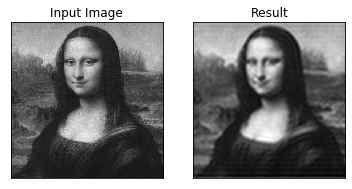

In [42]:
img =cv2.imread("lisa.jfif",0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32,flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows,cols = img.shape
crow,ccol = int(rows/2),int(cols/2)     #中心位置

#低通滤波
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30,ccol-30:ccol+30] = 1

#IDFT
fshift = dft_shift*mask    #相当于与操作？
f_ishift = np.fft.fftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img,cmap = "gray")
plt.title("Input Image"),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(img_back,cmap = "gray")
plt.title("Result"),plt.xticks([]),plt.yticks([])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

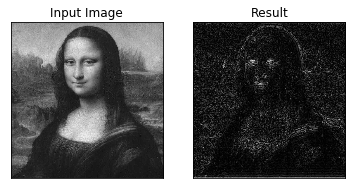

In [43]:
img =cv2.imread("lisa.jfif",0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32,flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows,cols = img.shape
crow,ccol = int(rows/2),int(cols/2)     #中心位置

#高通滤波
mask = np.ones((rows,cols,2),np.uint8)
mask[crow-30:crow+30,ccol-30:ccol+30] = 0

#IDFT
fshift = dft_shift*mask    #相当于与操作？
f_ishift = np.fft.fftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img,cmap = "gray")
plt.title("Input Image"),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(img_back,cmap = "gray")
plt.title("Result"),plt.xticks([]),plt.yticks([])
plt.show